# Capstone project- Heart disease prevention

**Features used in this lab:**
- `age`: age of the patient
- `oldpeak`: ST depression induced by exercise relative to rest. This means how much the ST segment lowered after exercise, in relation with the ST segment under rest conditions.
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `maxheartrate`: maximum heart rate achieved
- `diagnosis`: diagnosis of heart disease (angiographic disease status). 0 = < 50% diameter narrowing, 1 = > 50% diameter narrowing

**Other features you can explore:**
- `sex`: sex of the patient (1=male, 0=female)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholesterol in mg/dl
- `restecg`: resting electrocardiographic results (0 = normal,1 = having ST-T wave abnormality, 2 =  showing probable or definite left ventricular hypertrophy)
- `exang`: exercise induced angina
- `slope`: the slope of the peak exercise ST segment
- `ca`: number of major vessels (0-3) colored by fluoroscopy
- `thal`: 0 = normal; 1 = fixed defect; 2 = reversible defect
- `cp`: chest pain type (0 = typical angina, 1 = atypical angina, 2 =  non-anginal pain, 3 = asymptomatic)

In [6]:
# import libraries and load the dataset
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# load the heart dataset
heart = pd.read_csv('./data/heart.csv')

# inspect the first few rows of the dataset
print(heart.head())

   age  oldpeak  fbs  sex  cp  trestbps  chol  restecg  maxheartrate  exang  \
0   29      1.0    0    1   0       125   212        1           168      0   
1   29      3.1    1    1   0       140   203        0           155      1   
2   29      2.6    0    1   0       145   174        1           125      1   
3   29      0.0    0    1   0       148   203        1           161      0   
4   34      1.9    1    0   0       138   294        1           106      0   

   slope  ca  thal  diagnosis  
0      2   2     3          0  
1      0   0     3          0  
2      0   0     3          0  
3      2   1     3          0  
4      1   3     2          0  


In [7]:
# dataset information
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1025 non-null   int64  
 1   oldpeak       1025 non-null   float64
 2   fbs           1025 non-null   int64  
 3   sex           1025 non-null   int64  
 4   cp            1025 non-null   int64  
 5   trestbps      1025 non-null   int64  
 6   chol          1025 non-null   int64  
 7   restecg       1025 non-null   int64  
 8   maxheartrate  1025 non-null   int64  
 9   exang         1025 non-null   int64  
 10  slope         1025 non-null   int64  
 11  ca            1025 non-null   int64  
 12  thal          1025 non-null   int64  
 13  diagnosis     1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


## 01. Descriptive statistics

### 01.1 Distribution
**What distribution does `maxheartrate` follow?**

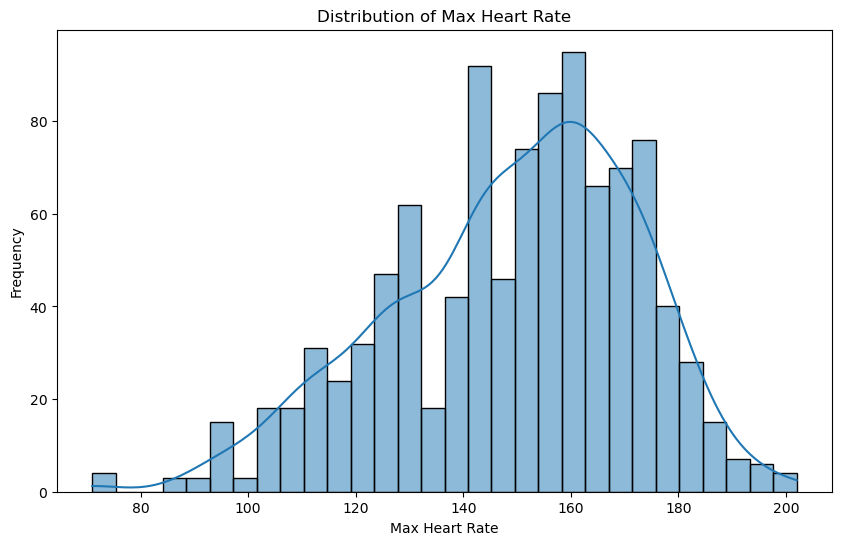

In [ ]:
# plot the distribution for `maxheartrate`
plt.figure(figsize=(10, 6))
sns.histplot(heart['maxheartrate'], kde=True, bins=30)
plt.title('Distribution of Max Heart Rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# check the type of the distribution of `maxheartrate` column
print("Distribution type for 'maxheartrate':", stats.normaltest(heart['maxheartrate']))
# check the mean and standard deviation of `maxheartrate`
mean_maxheartrate = heart['maxheartrate'].mean()
std_maxheartrate = heart['maxheartrate'].std()
print(f"Mean of maxheartrate: {mean_maxheartrate}")
print(f"Standard deviation of maxheartrate: {std_maxheartrate}")


Distribution type for 'maxheartrate': NormaltestResult(statistic=41.00293544867992, pvalue=1.2483193324863939e-09)
Mean of maxheartrate: 149.11414634146342
Standard deviation of maxheartrate: 23.005723745977196


From the results above, we see that the distribution is not normal.
From the histogram, we see the distribution is a little skewed to the right.
We can try the code block below to check for different distributions.

**Interpretation**
- Null hypothesis (H₀): Data follows the given distribution.
- If p-value < 0.05 → reject H₀ (distribution does not fit well).
- Higher p-value = better fit (but doesn’t prove it’s the distribution).

In [13]:
data = heart['maxheartrate']

distributions = ['norm', 'gamma', 'lognorm', 'expon', 'beta']
results = []

for dist_name in distributions:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    ks_stat, p_value = stats.kstest(data, dist_name, args=params)
    results.append((dist_name, p_value, params))

# Sort by p-value (best fit first)
results.sort(key=lambda x: x[1], reverse=True)

for dist_name, p_value, params in results:
    print(f"{dist_name:8s} p-value={p_value:.4f}, params={params}")



beta     p-value=0.1051, params=(28.18833190267824, 6.450040614459795, -137.07226655287621, 351.6672794908944)
norm     p-value=0.0001, params=(149.11414634146342, 22.994498703227485)
lognorm  p-value=0.0001, params=(4.772554144465139e-06, -4817926.523723729, 4818075.637815199)
gamma    p-value=0.0000, params=(278.0072881177915, -241.82321905995002, 1.406089661562341)
expon    p-value=0.0000, params=(71.0, 78.11414634146342)


/usr/local/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


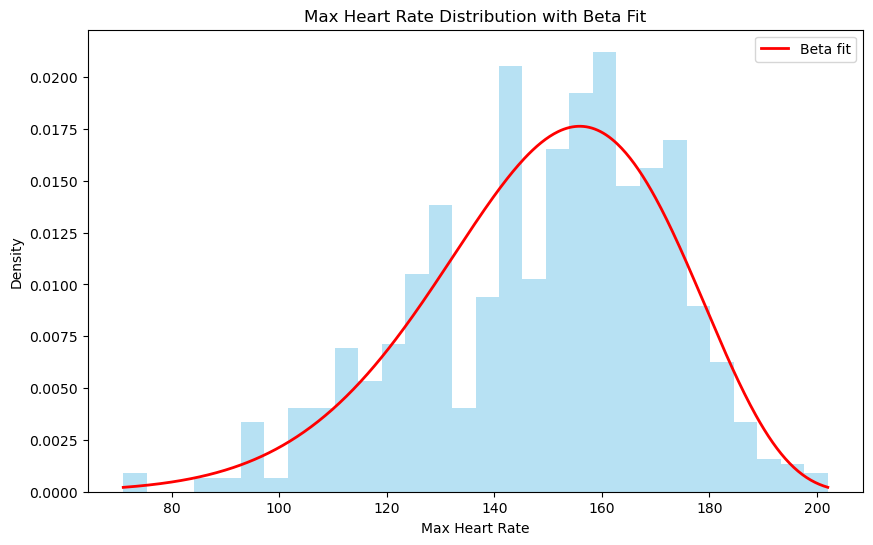

In [15]:
# Histogram to check the fit of the beta distribution
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')

# Overlay beta PDF
x = np.linspace(min(data), max(data), 500)
a, b, loc, scale = 28.1883, 6.4500, -137.0723, 351.6673
pdf_beta = stats.beta.pdf((x - loc) / scale, a, b) / scale
plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta fit')

plt.title("Max Heart Rate Distribution with Beta Fit")
plt.xlabel("Max Heart Rate")
plt.ylabel("Density")
plt.legend()
plt.show()


- The beta distribution fits your maxheartrate data best among the candidates tested.

- p = 0.1051 means you fail to reject the null hypothesis at α=0.05, so beta is a plausible model.

- All others (normal, lognormal, gamma, exponential) have extremely low p-values → poor fits.

### 01.2 Skewness
**Which features show a negative skew?**

- NOTE: skewness measures which tail is longer/rarer.

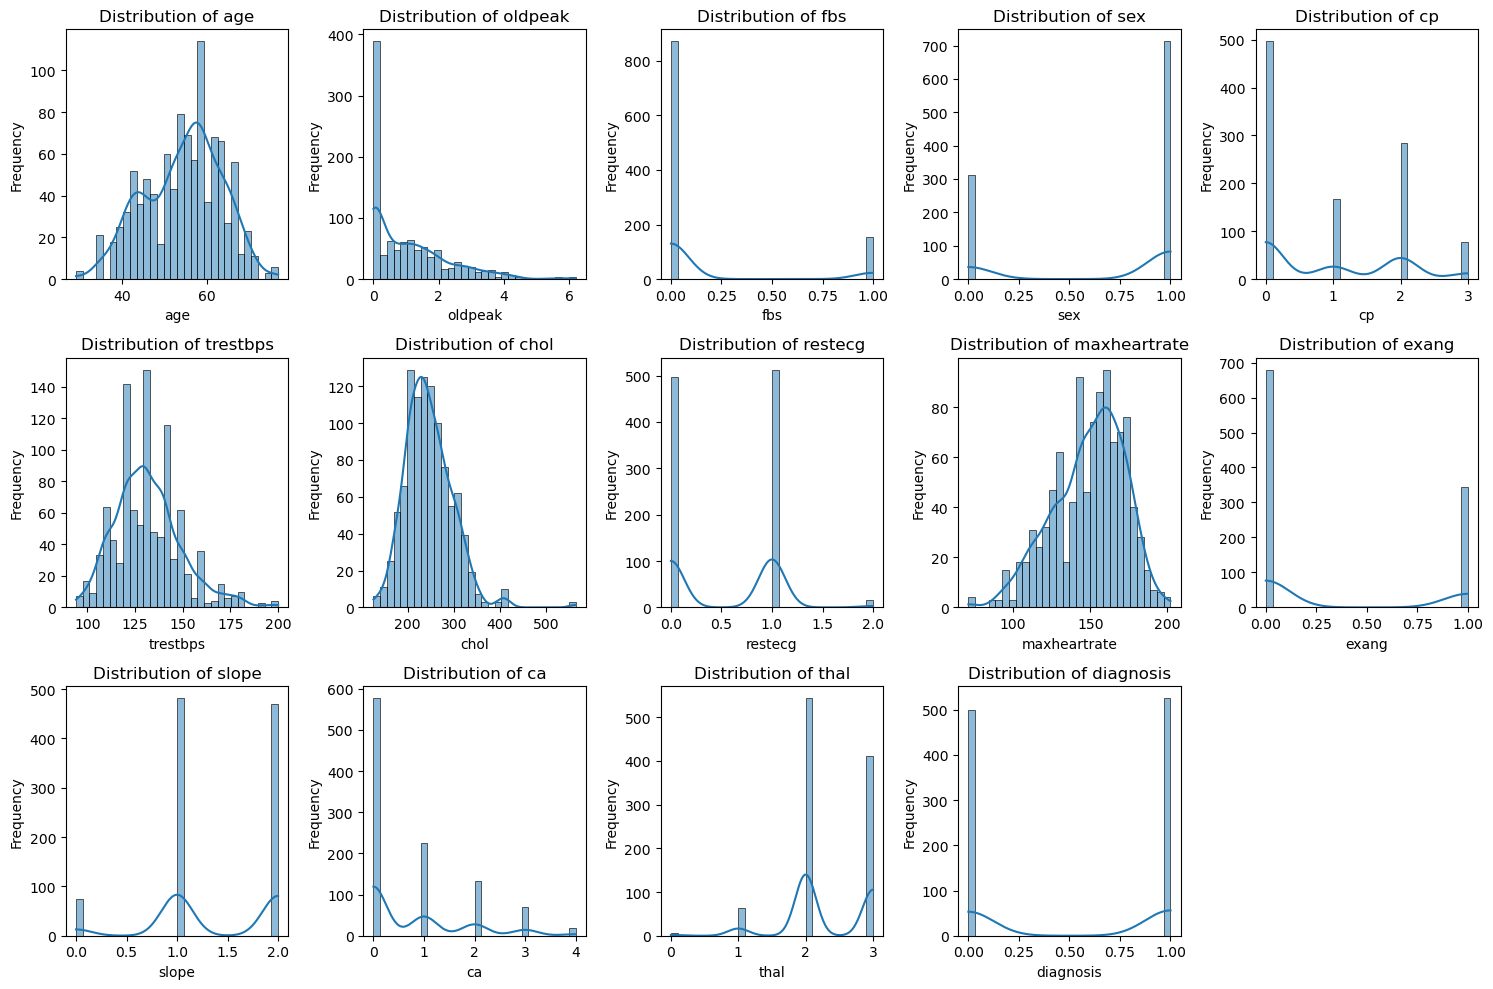

In [16]:
# plot the distribution of all features for visual inspection of skewness
plt.figure(figsize=(15, 10))
for i, column in enumerate(heart.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(heart[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [17]:
# check skewness of each feature
skewness = heart.skew()
negative_skew_features = skewness[skewness < 0].index.tolist()
print("Features with negative skew:", negative_skew_features)

Features with negative skew: ['age', 'sex', 'maxheartrate', 'slope', 'thal', 'diagnosis']


**In what range would you expect 68% of the `maxheartrate` values to be?**

Since we found that the distribution is not normal, we cannot say it falls within 1std of the data.
We will use the beta PPF (inverse CDF) with the fitted parameters (a, b, loc, scale) to get the 16th and 84th percentiles.

In [18]:
from scipy.stats import beta
a, b, loc, scale = 28.18833190267824, 6.450040614459795, -137.07226655287621, 351.6672794908944

lo = beta.ppf(0.16, a, b, loc=loc, scale=scale)
hi = beta.ppf(0.84, a, b, loc=loc, scale=scale)
print(lo, hi)  # central 68% range under beta fit


126.25870412071464 171.92786791498116


## 02. Segmentation

Which diagnosis group (sick or healthy) has a higher proportion of patients with fasting blood sugar (fbs) = 1?

In [19]:
# proportion of patients with fbs = 1 in each diagnosis group
fbs_proportion = heart.groupby('diagnosis')['fbs'].mean()
print("Proportion of patients with fbs = 1 in each diagnosis group:")
print(fbs_proportion)

Proportion of patients with fbs = 1 in each diagnosis group:
diagnosis
0    0.164329
1    0.134981
Name: fbs, dtype: float64


What is the difference between the average maxheartrate of sick patients and the average maxheartrate of healthy patients?

In [20]:
# average maxheartrate for sick and healthy patients
avg_maxheartrate = heart.groupby('diagnosis')['maxheartrate'].mean()
print("Average maxheartrate for each diagnosis group:")
print(avg_maxheartrate)

Average maxheartrate for each diagnosis group:
diagnosis
0    139.130261
1    158.585551
Name: maxheartrate, dtype: float64


## 03. Inferential statistics

- **Would you expect the margin of error increase or decrease if you get your hands on a lot more data?**
    - Decrease, because the margin of error is inversely proportional to the square root of the sample size.
- **What do the upper and lower limits of confidence intervals correspond to in statistical analysis?**
    - They mark the range within which the true population parameter is likely to lie, given the chosen confidence level.


In [21]:
# find the proportion of patients with a heart disease and create a 95% confidence interval for the estimated proportion
n = len(heart)
p_hat = heart['diagnosis'].mean()  # proportion of patients with heart disease
z = stats.norm.ppf(0.975)  # z-score for 95%
margin_of_error = z * np.sqrt((p_hat * (1 - p_hat)) / n)
lower_limit = p_hat - margin_of_error
upper_limit = p_hat + margin_of_error
print(f"95% confidence interval for the proportion of patients with heart disease: ({lower_limit:.4f}, {upper_limit:.4f})")
print(f"Estimated proportion of patients with heart disease: {p_hat:.4f}")
print(f"Margin of error: {margin_of_error:.4f}")

95% confidence interval for the proportion of patients with heart disease: (0.4826, 0.5438)
Estimated proportion of patients with heart disease: 0.5132
Margin of error: 0.0306


- **Determine if `maxheartrate` is higher in sick patients compared to healthy ones.**

    - H0: mean(maxheartrate / healthy) = mean (maxheartrate / sick)
    - H1: mean (maxheartreate / sick) > mean(maxheartreate/healthy)
    - Test: Two-sample t-test, right-tailed

In [22]:
# determine if `maxheartrate` is higher in sick patients compared to healthy ones
sick_maxheartrate = heart[heart['diagnosis'] == 1]['maxheartrate']
healthy_maxheartrate = heart[heart['diagnosis'] == 0]['maxheartrate']
t_stat, p_value = stats.ttest_ind(sick_maxheartrate, healthy_maxheartrate, alternative='greater')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: maxheartrate is significantly higher in sick patients.")
else:
    print("Fail to reject the null hypothesis: no significant difference in maxheartrate between sick and healthy patients.")

T-statistic: 14.926471051150799, P-value: 4.981485420176904e-46
Reject the null hypothesis: maxheartrate is significantly higher in sick patients.
